In [4]:
# Search for "Techniclly Valued Stocks"
# Importing the required libraries
from finvizfinance.screener.overview import Overview
import pandas as pd
import csv
import os

# Define the function to get undervalued stocks
def get_undervalued_stocks():
    """
    Returns a list of tickers with:
    
    - Positive Operating Margin
    - Debt-to-Equity ratio under 1
    - Low P/B (under 1)
    - Low P/E ratio (under 25)
    - Low PEG ratio (under 1)
    - Positive Insider Transactions
    """
    # Create an Overview object
    foverview = Overview()
    
    # Define filters to screen for undervalued stocks
    filters_dict = {'Debt/Equity':'Under 1', 
                    'PEG':'Low (<1)', 
                    'Operating Margin':'Positive (>0%)', 
                    'P/B':'Low (<1)',
                    'P/E':'Under 25',
                    'InsiderTransactions':'Positive (>0%)'}
    
    try:
        # Set filters for the Overview object
        foverview.set_filter(filters_dict=filters_dict)
        
        # Get the screener view data
        df_overview = foverview.screener_view()
        
        # Create 'out' directory if it doesn't exist
        if not os.path.exists('out'):
            os.makedirs('out')
        
        # Save the data to a CSV file
        df_overview.to_csv('out/Overview.csv', index=True)
        
        # Get the tickers from the DataFrame
        tickers = df_overview['Ticker'].tolist()
        
        return tickers
    
    except Exception as e:
        print(f"Error occurred: {e}")
        return None

# Uncomment the following line to print the list of undervalued stocks
print('Todays Undervalued Stock Picks')
print(get_undervalued_stocks())


Todays Undervalued Stock Picks
['AMPY', 'BOOM', 'BWEN', 'BY', 'CAAS', 'CBFV', 'CNOB', 'FNB', 'FSBW', 'HAFC', 'MTW', 'OPBK', 'REI', 'SMMF', 'TCBX', 'VTLE', 'WNEB']


C:\Users\benja\Documents\Jupyter\venv\Lib\site-packages\finvizfinance\screener\overview.py:203: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame(frame)], ignore_index=True)


In [5]:
# "Techniclly Valued Stocks" AS A TABLE

import pandas as pd
from tabulate import tabulate

# Read the CSV file into a DataFrame
overview_df = pd.read_csv('out/Overview.csv')

# Display the DataFrame as a table
print(tabulate(overview_df, headers='keys', tablefmt='pretty'))


+----+------------+--------+---------------------------------+-------------------+-------------------------------------+---------+--------------+-------+-------+---------------------+-----------+
|    | Unnamed: 0 | Ticker |             Company             |      Sector       |              Industry               | Country |  Market Cap  |  P/E  | Price |       Change        |  Volume   |
+----+------------+--------+---------------------------------+-------------------+-------------------------------------+---------+--------------+-------+-------+---------------------+-----------+
| 0  |     0      |  AMPY  |      Amplify Energy Corp.       |      Energy       |            Oil & Gas E&P            |   USA   | 277870000.0  | 0.73  | 7.04  | -0.0070999999999999 | 551775.0  |
| 1  |     1      |  BOOM  |         DMC Global Inc          |      Energy       |   Oil & Gas Equipment & Services    |   USA   | 333860000.0  | 15.65 | 16.87 | -0.0375999999999999 | 123564.0  |
| 2  |     2      | 

In [6]:
# Current Byline Sentiment Analysis
# Importing required libraries
from finvizfinance.screener.overview import Overview
from tabulate import tabulate
import pandas as pd
from goose3 import Goose
from requests import get
from transformers import pipeline
from transformers import BertTokenizer, BertForSequenceClassification
import yfinance as yf
import os

# Function to get the sentiment of financial news articles for a given ticker
def get_ticker_news_sentiment(ticker):
    """
    Returns a Pandas dataframe of the given ticker's most recent news article headlines,
    with the overall sentiment of each article.

    Args:
        ticker (string)

    Returns:
        pd.DataFrame: {'Date', 'Article title', Article sentiment', 'ticker symbol'}
    """
    ticker_news = yf.Ticker(ticker)
    news_list = ticker_news.get_news()
    extractor = Goose()
    pipe = pipeline("text-classification", model="yiyanghkust/finbert-tone")

    data = []
    for dic in news_list:
        title = dic['title']
        url = dic['link'] 
        response = get(dic['link'])
        article = extractor.extract(raw_html=response.content)
        text = article.cleaned_text
        date = article.publish_date
        if len(text) > 2400:
            data.append({'Ticker': f'{ticker}',
                         'Date': f'{date}',
                         'Article title': f'{title}',
                         'Article sentiment': 'NaN too long',
                         'Article URL': f'{url}',  # Include the URL in the data
                        })
        else:
            results = pipe(text)
            data.append({'Ticker': f'{ticker}',
                         'Date': f'{date}',
                         'Article title': f'{title}',
                         'Article sentiment': 'NaN too long',
                         'Article URL': f'{url}',  # Include the URL in the data
                        })
    df = pd.DataFrame(data)
    return df

# Function to generate CSV file for a given ticker
def generate_csv(ticker):
    df = get_ticker_news_sentiment(ticker)
    print(tabulate(df,headers='keys', tablefmt='pretty'))
    df.to_csv(f'out/{ticker}.csv', index=False)

# Getting undervalued stocks
undervalued = get_undervalued_stocks()

# Generating CSV for each ticker
for ticker in undervalued:
    generate_csv(ticker)

C:\Users\benja\Documents\Jupyter\venv\Lib\site-packages\finvizfinance\screener\overview.py:203: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame(frame)], ignore_index=True)


+---+--------+--------------------------+-----------------------------------------------------------------------------------------------------+-------------------+--------------------------------------------------------------------------------------------+
|   | Ticker |           Date           |                                            Article title                                            | Article sentiment |                                        Article URL                                         |
+---+--------+--------------------------+-----------------------------------------------------------------------------------------------------+-------------------+--------------------------------------------------------------------------------------------+
| 0 |  AMPY  | 2024-04-15T10:12:00.000Z |                                New Strong Sell Stocks for April 15th                                |   NaN too long    |        https://finance.yahoo.com/news/strong-sell-stocks-april-15

[*********************100%%**********************]  1 of 1 completed


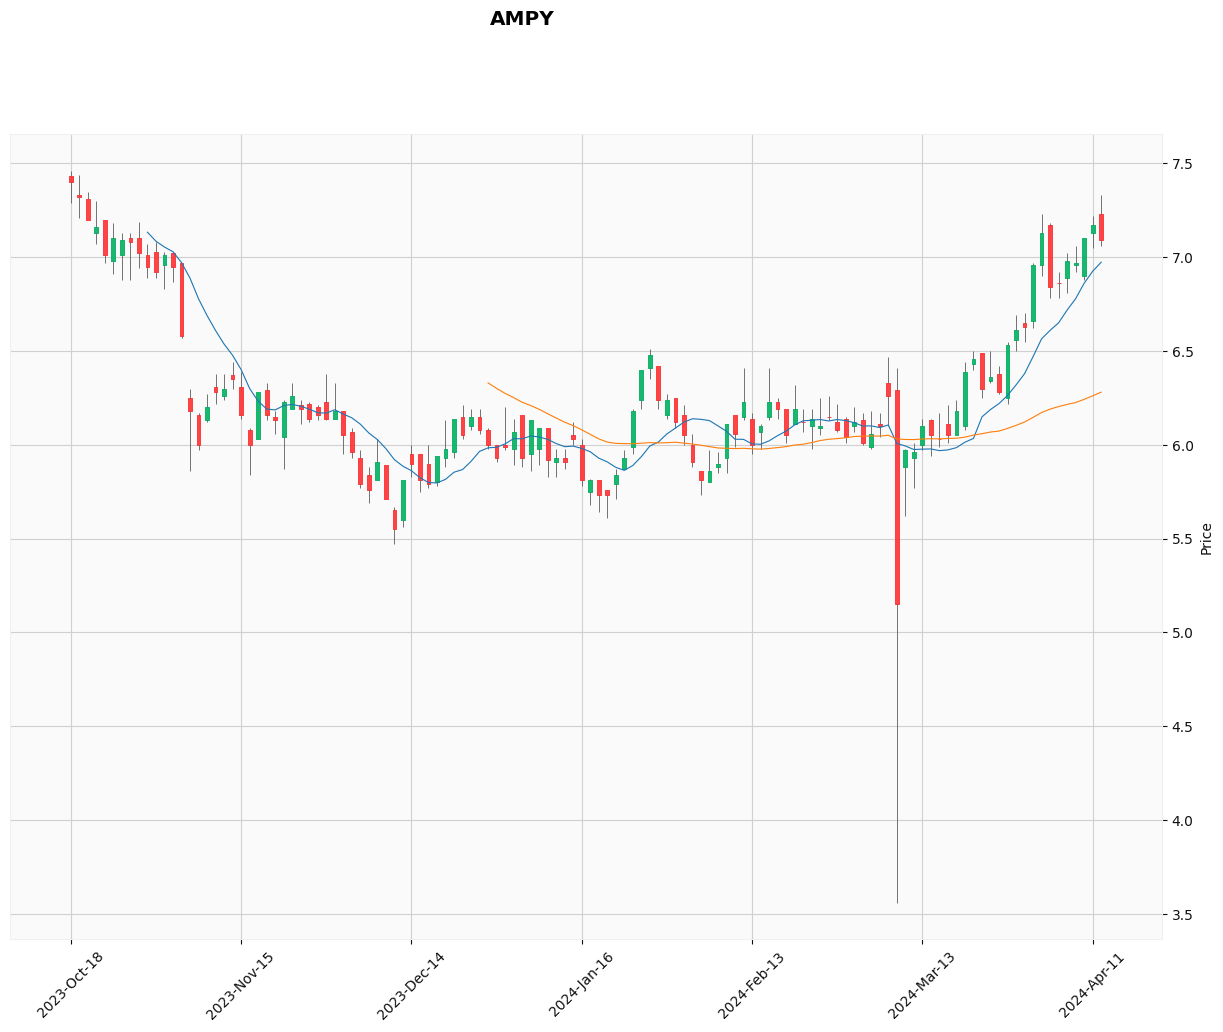

[*********************100%%**********************]  1 of 1 completed


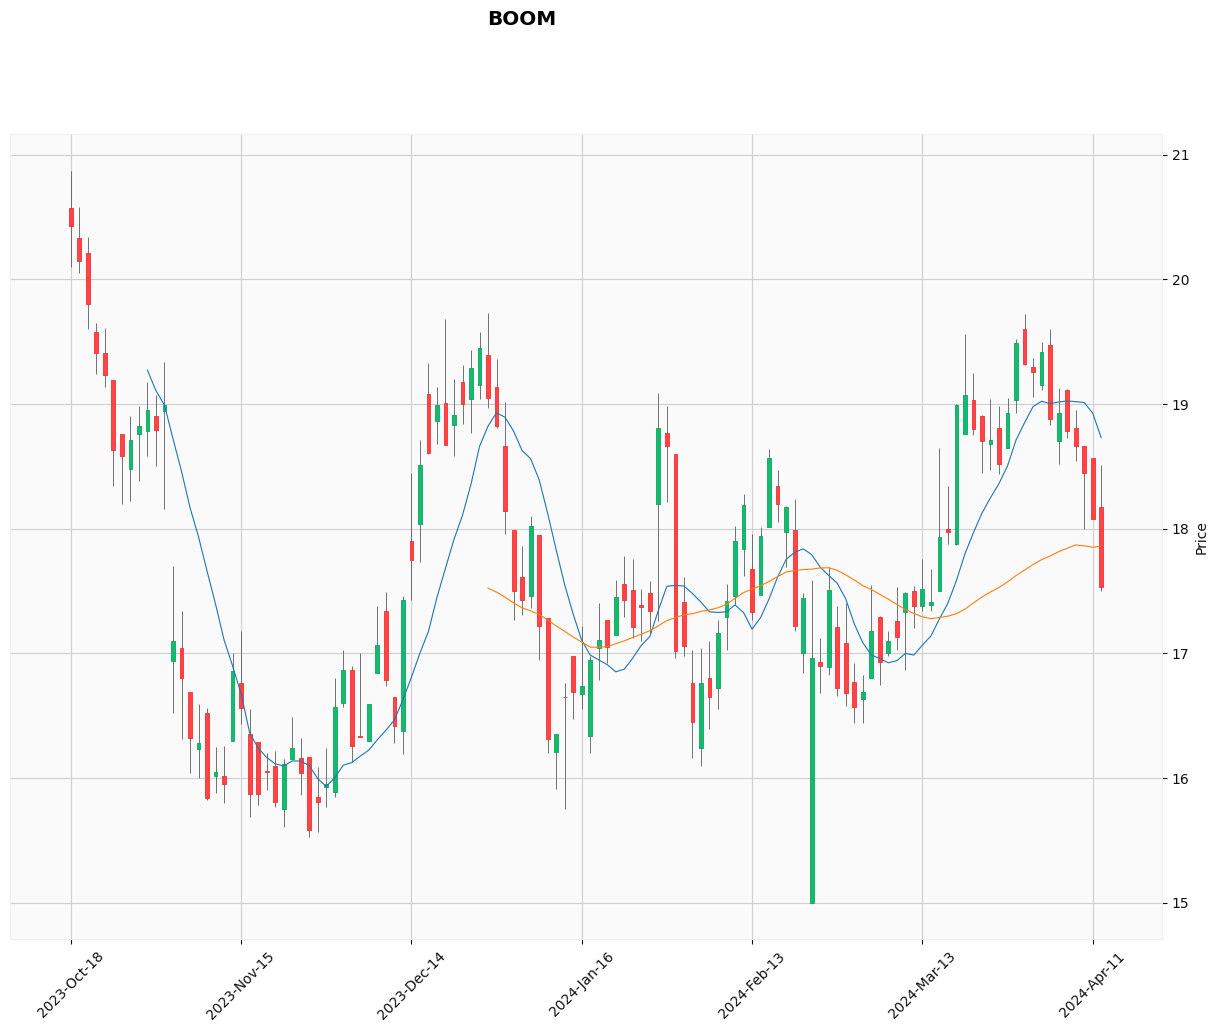

[*********************100%%**********************]  1 of 1 completed


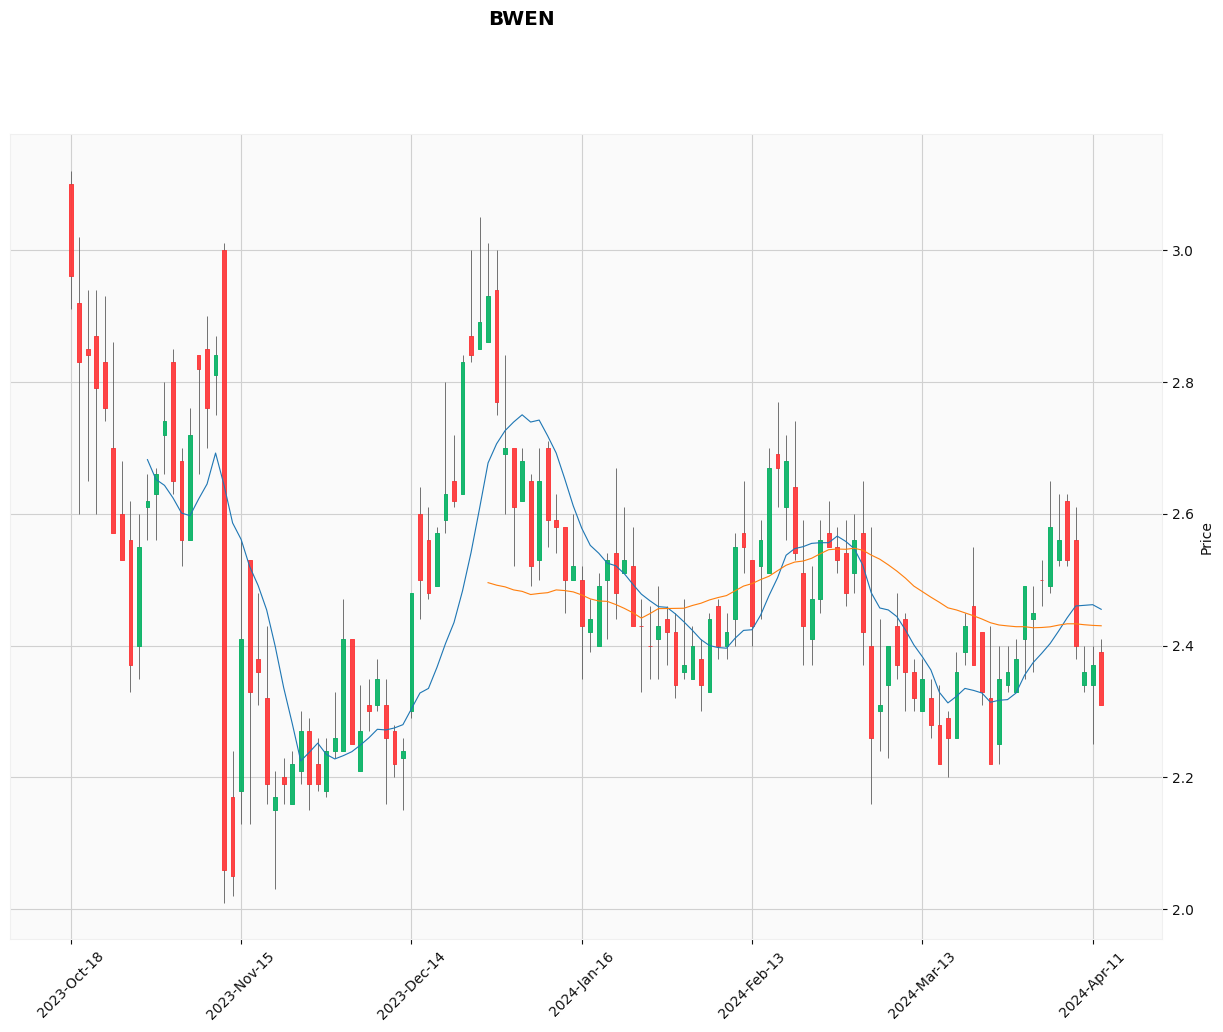

[*********************100%%**********************]  1 of 1 completed


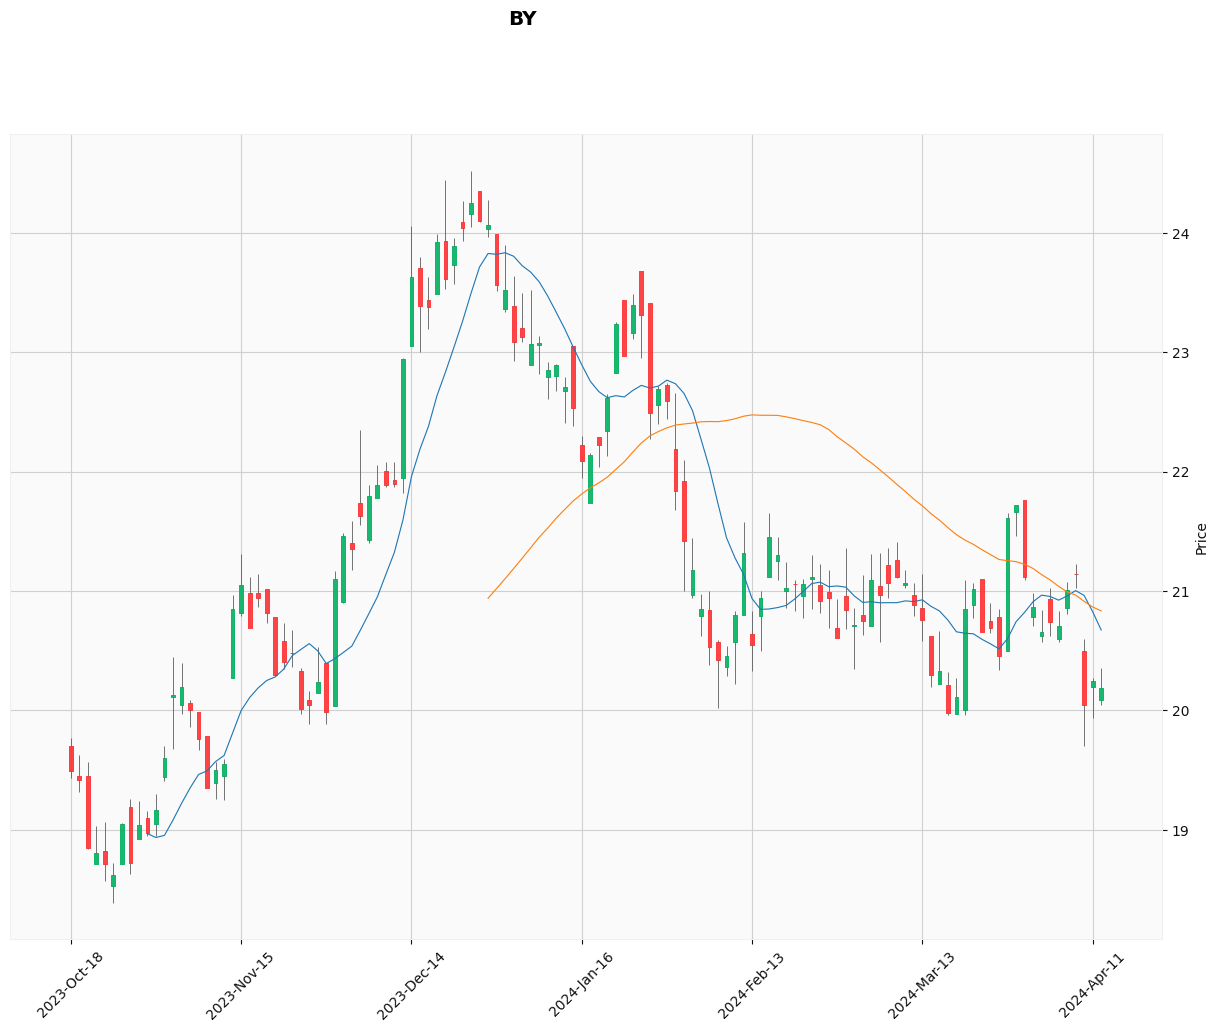

[*********************100%%**********************]  1 of 1 completed


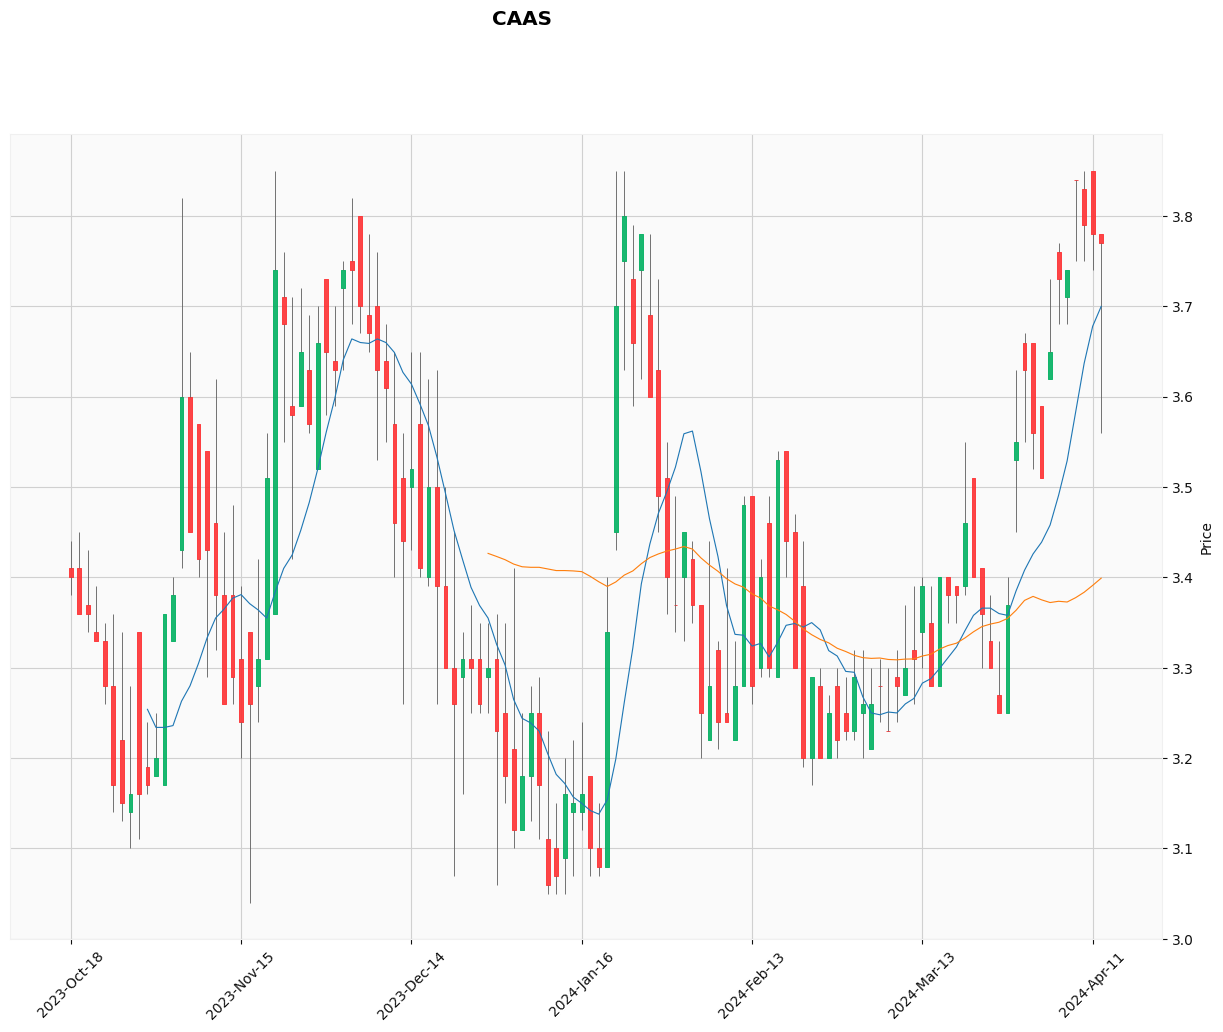

[*********************100%%**********************]  1 of 1 completed


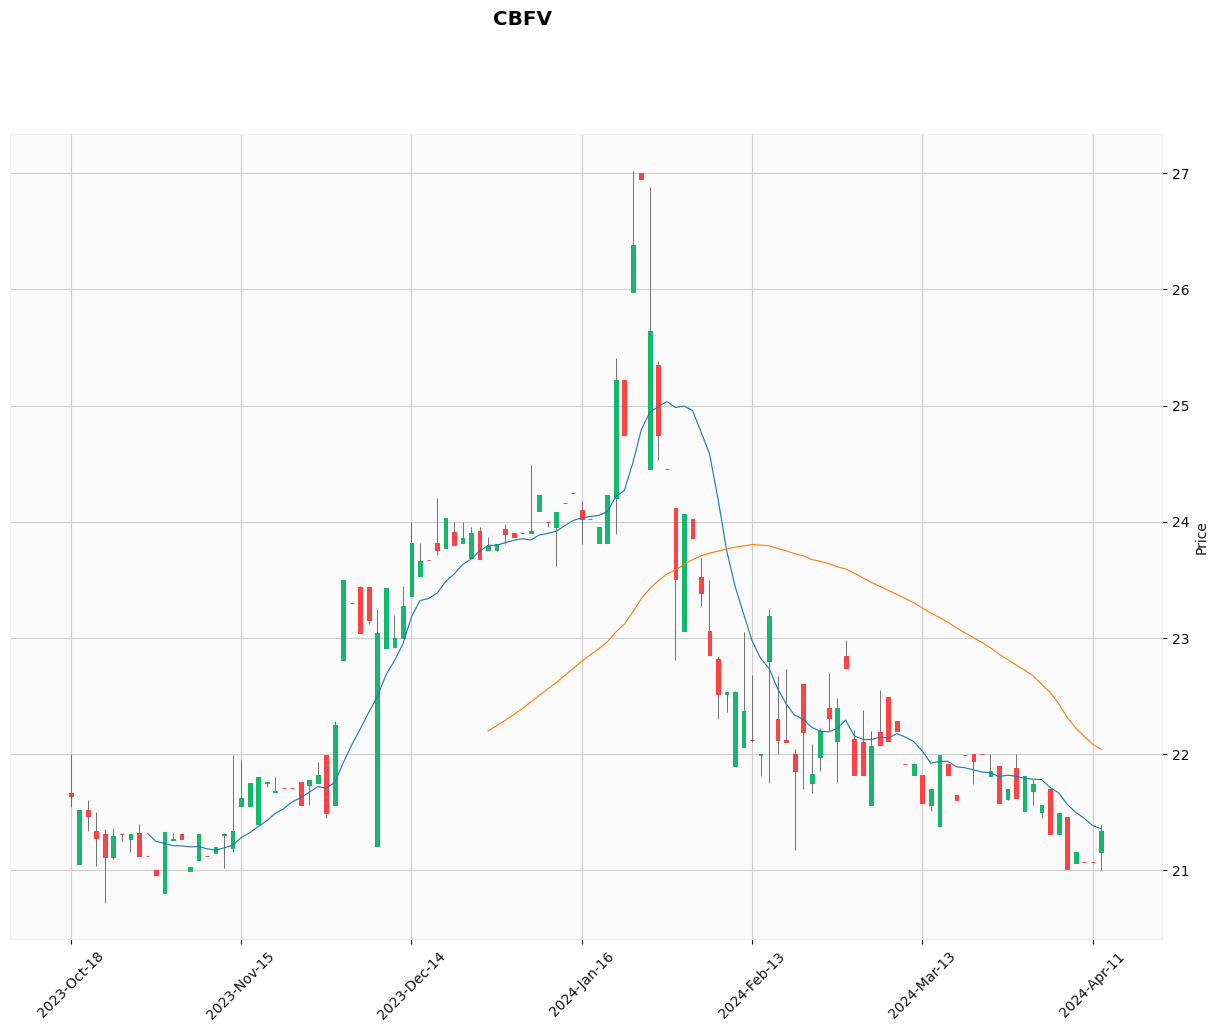

[*********************100%%**********************]  1 of 1 completed


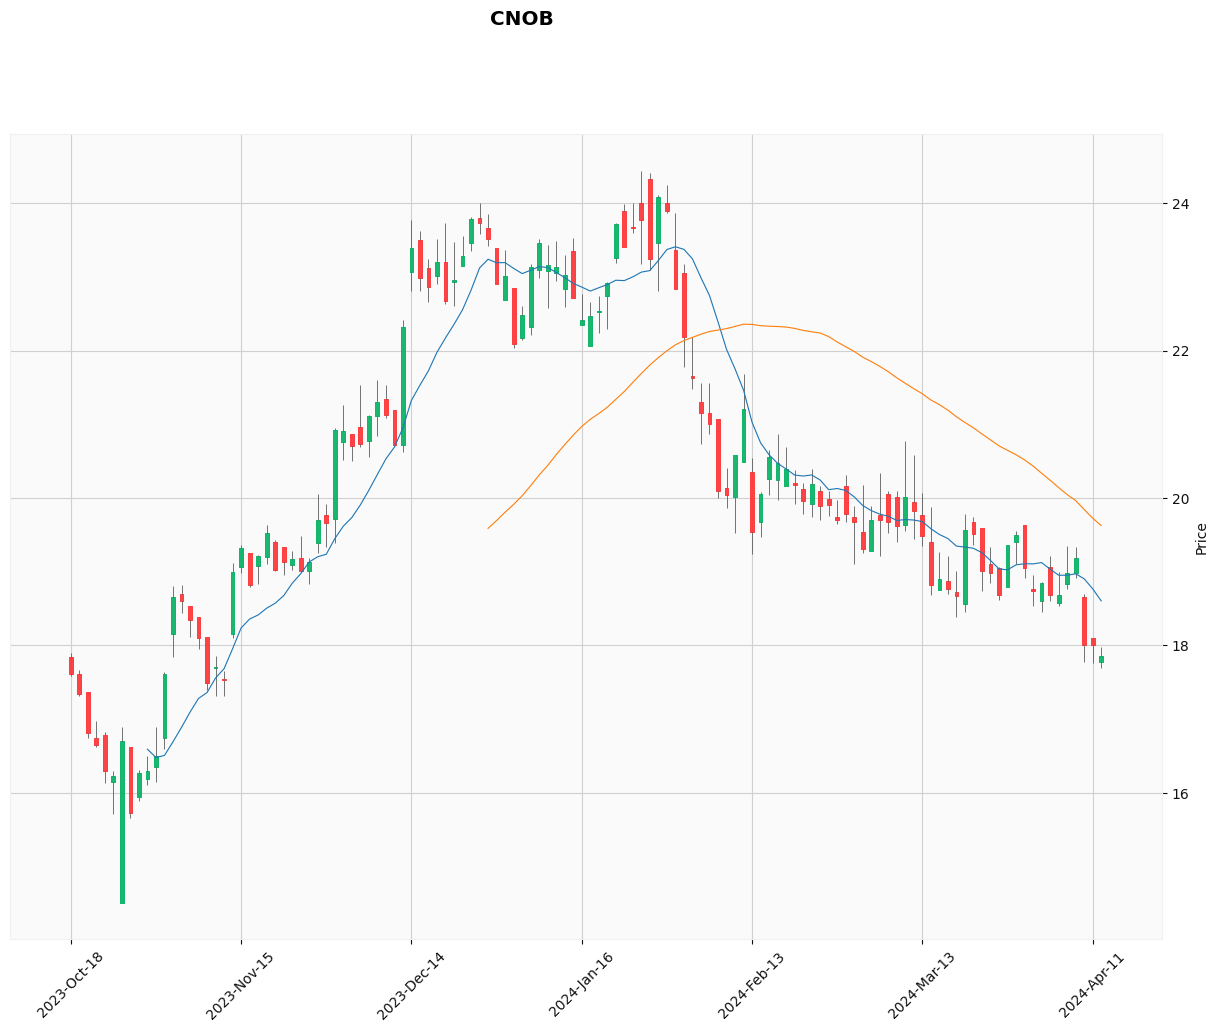

[*********************100%%**********************]  1 of 1 completed


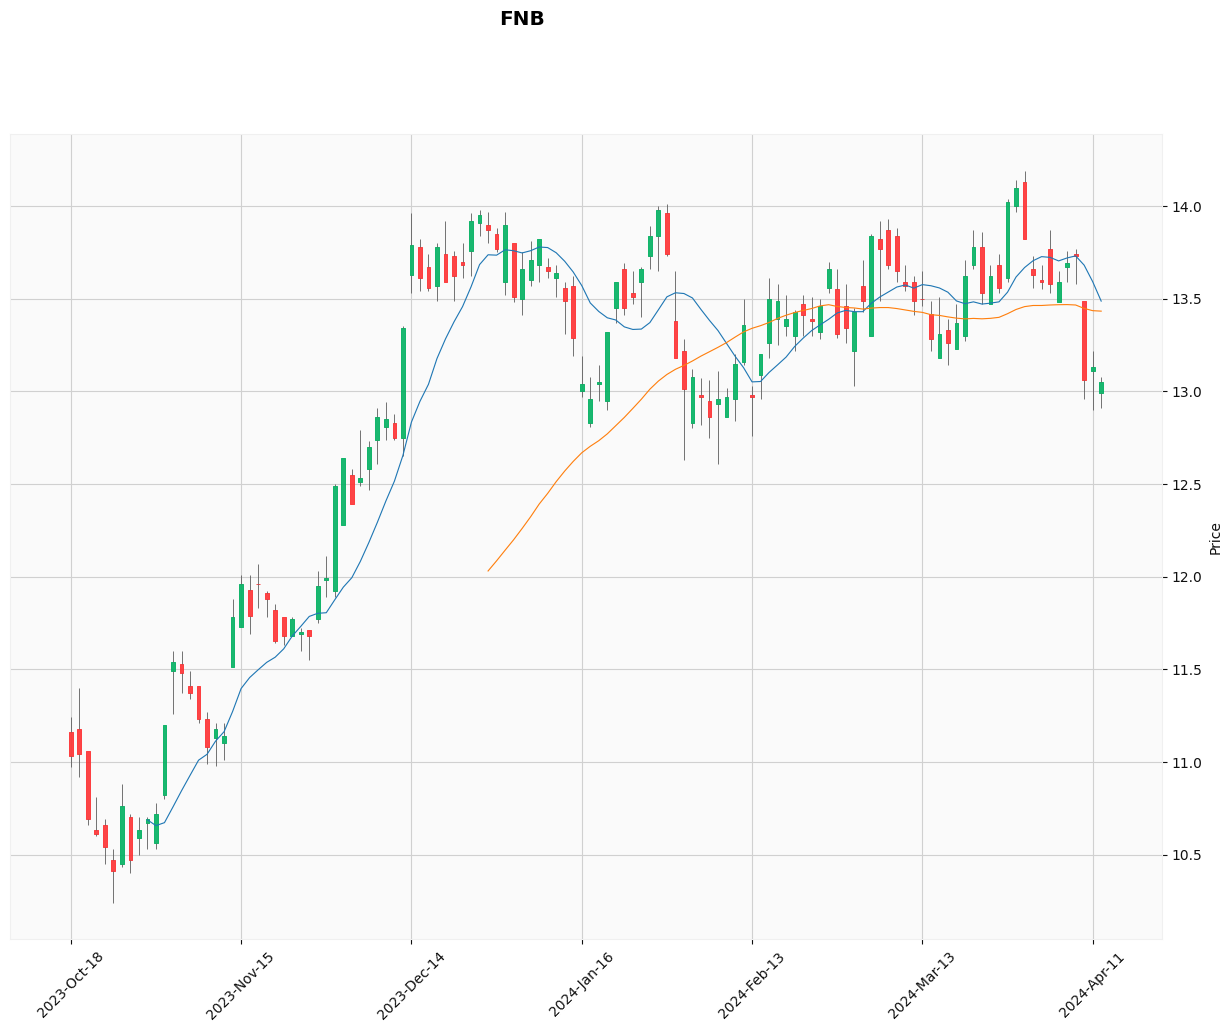

[*********************100%%**********************]  1 of 1 completed


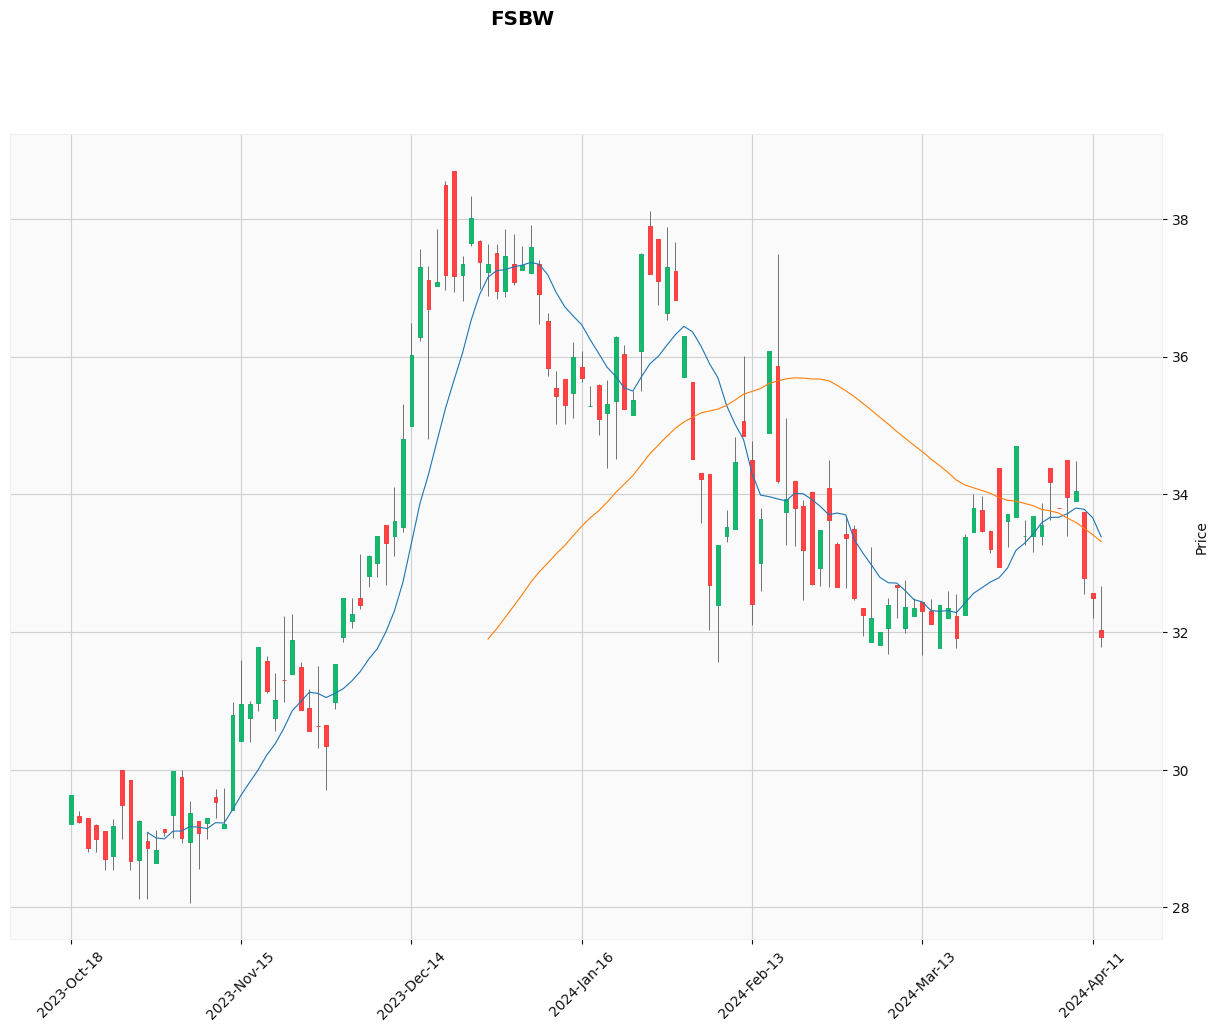

[*********************100%%**********************]  1 of 1 completed


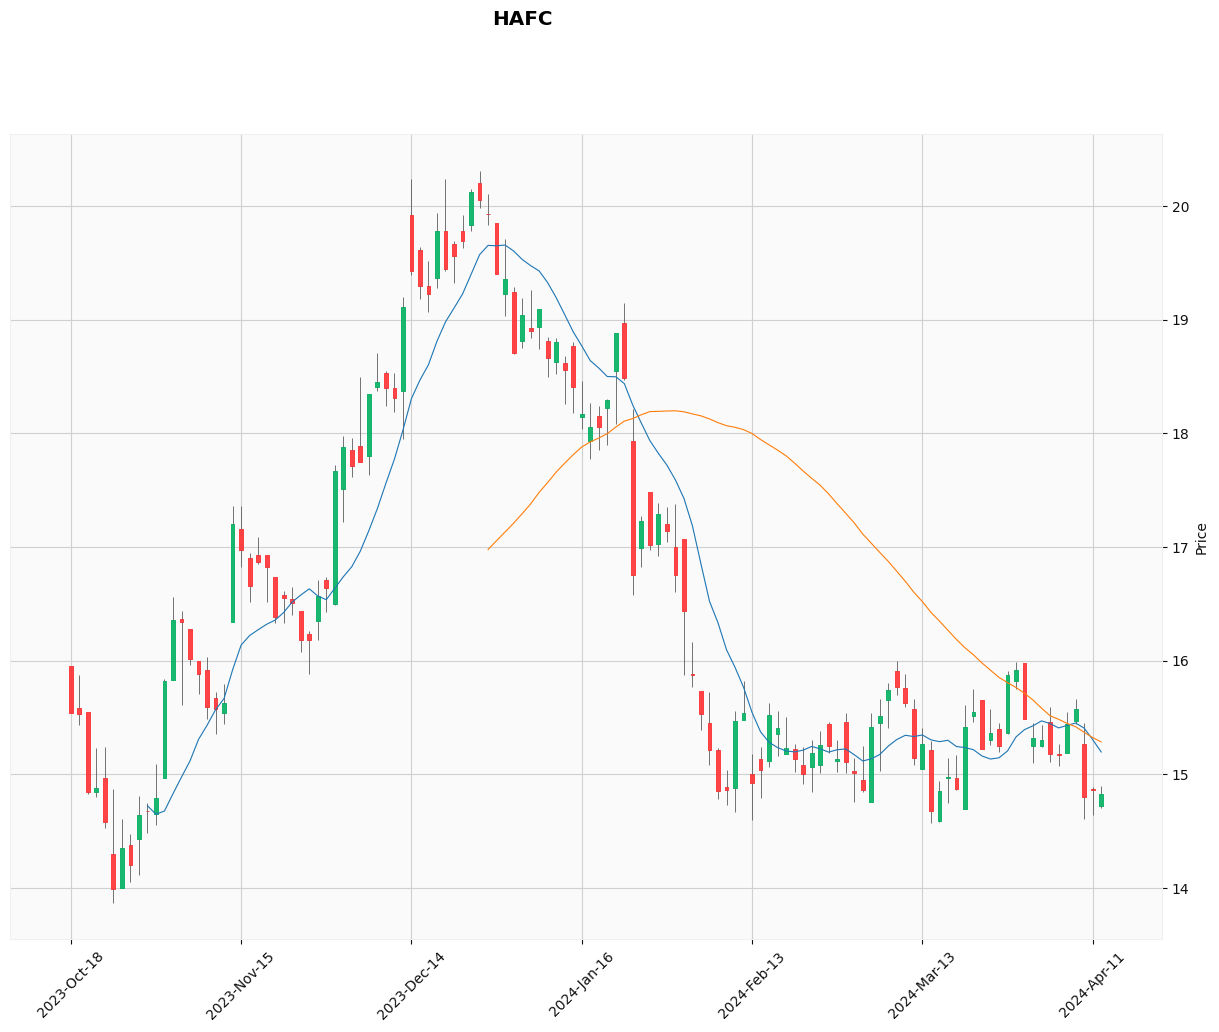

[*********************100%%**********************]  1 of 1 completed


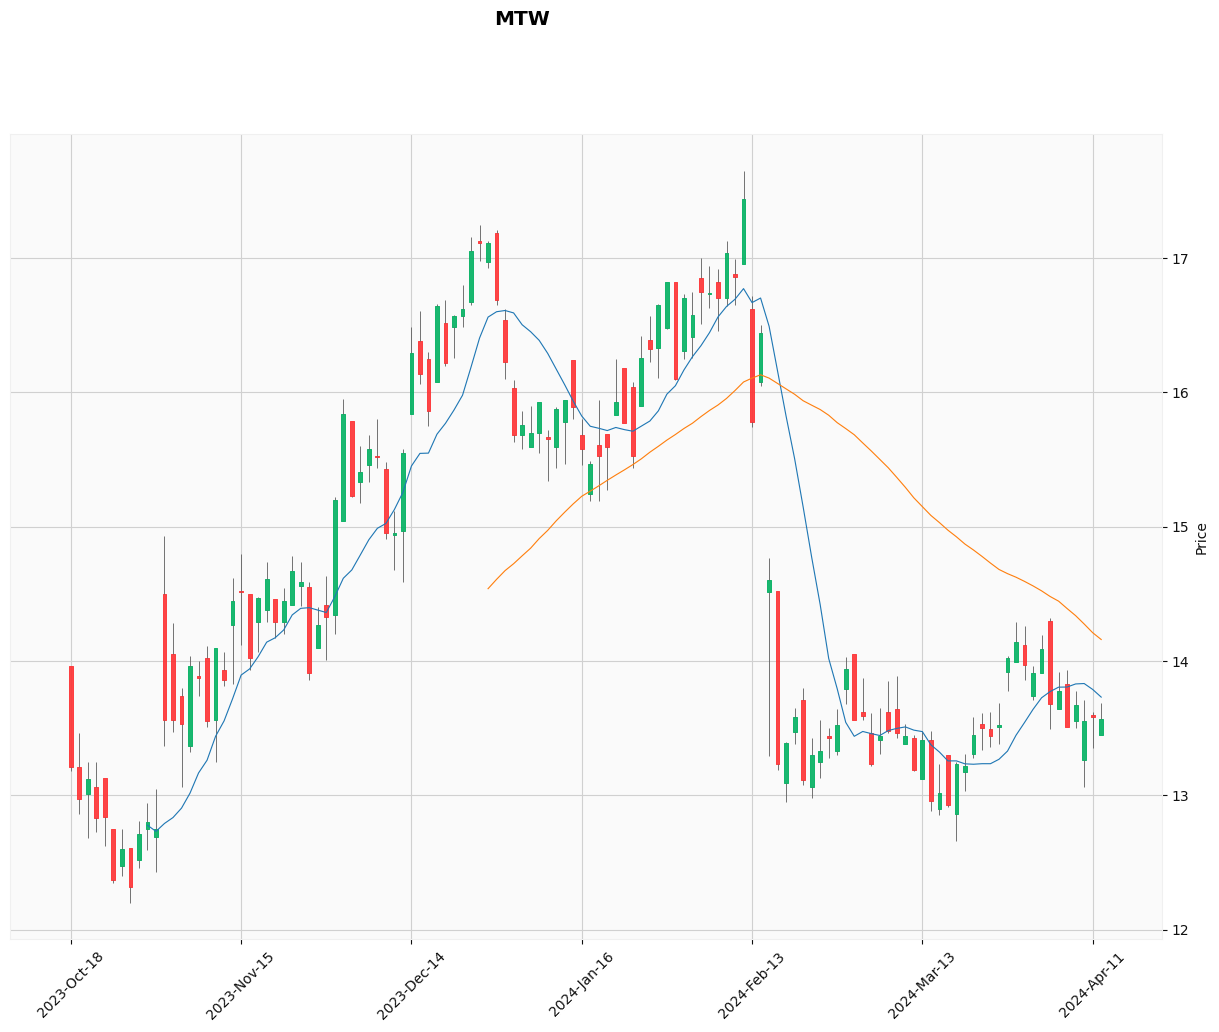

[*********************100%%**********************]  1 of 1 completed


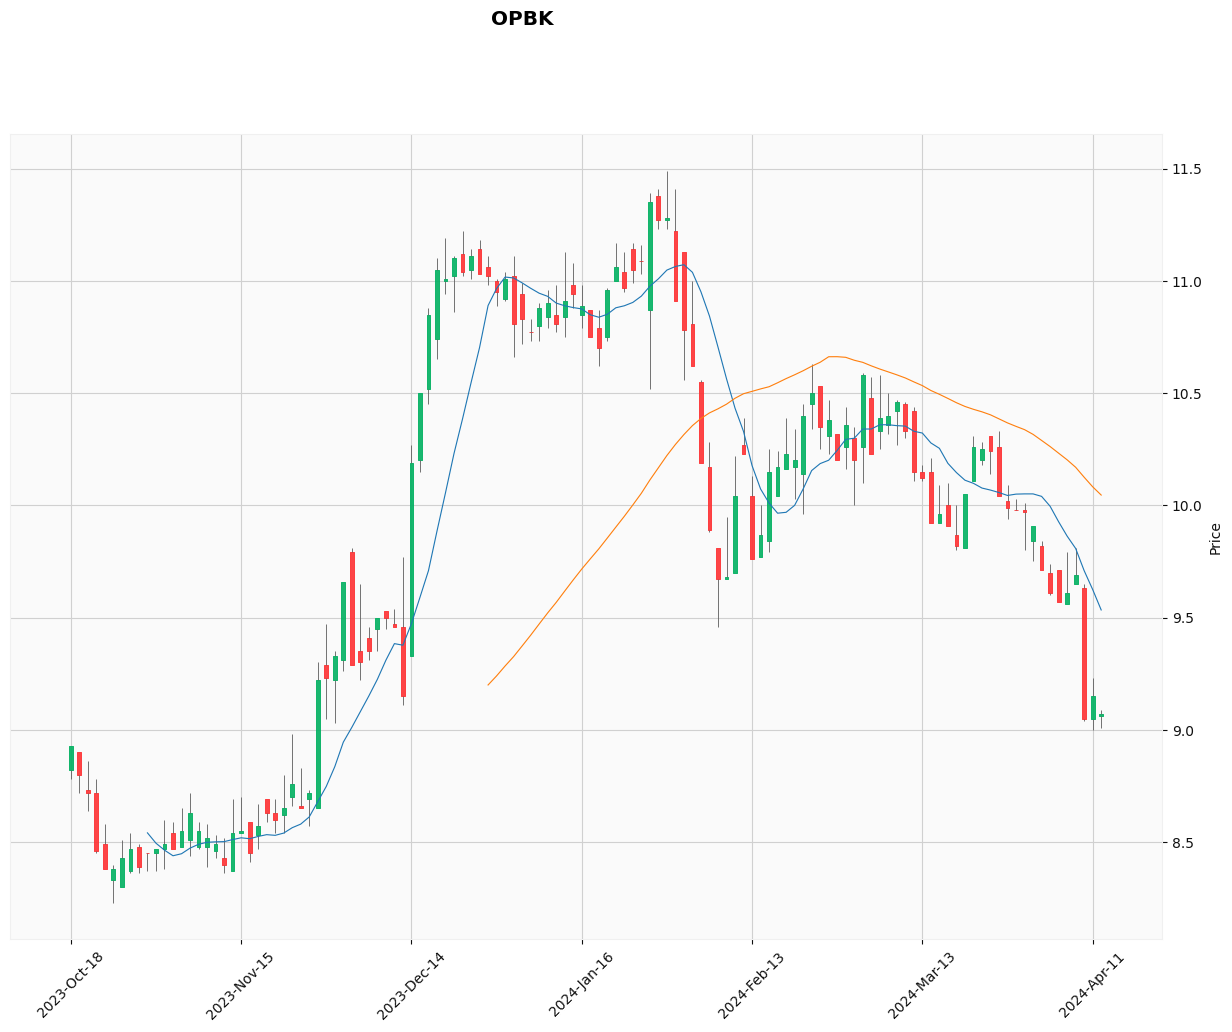

[*********************100%%**********************]  1 of 1 completed


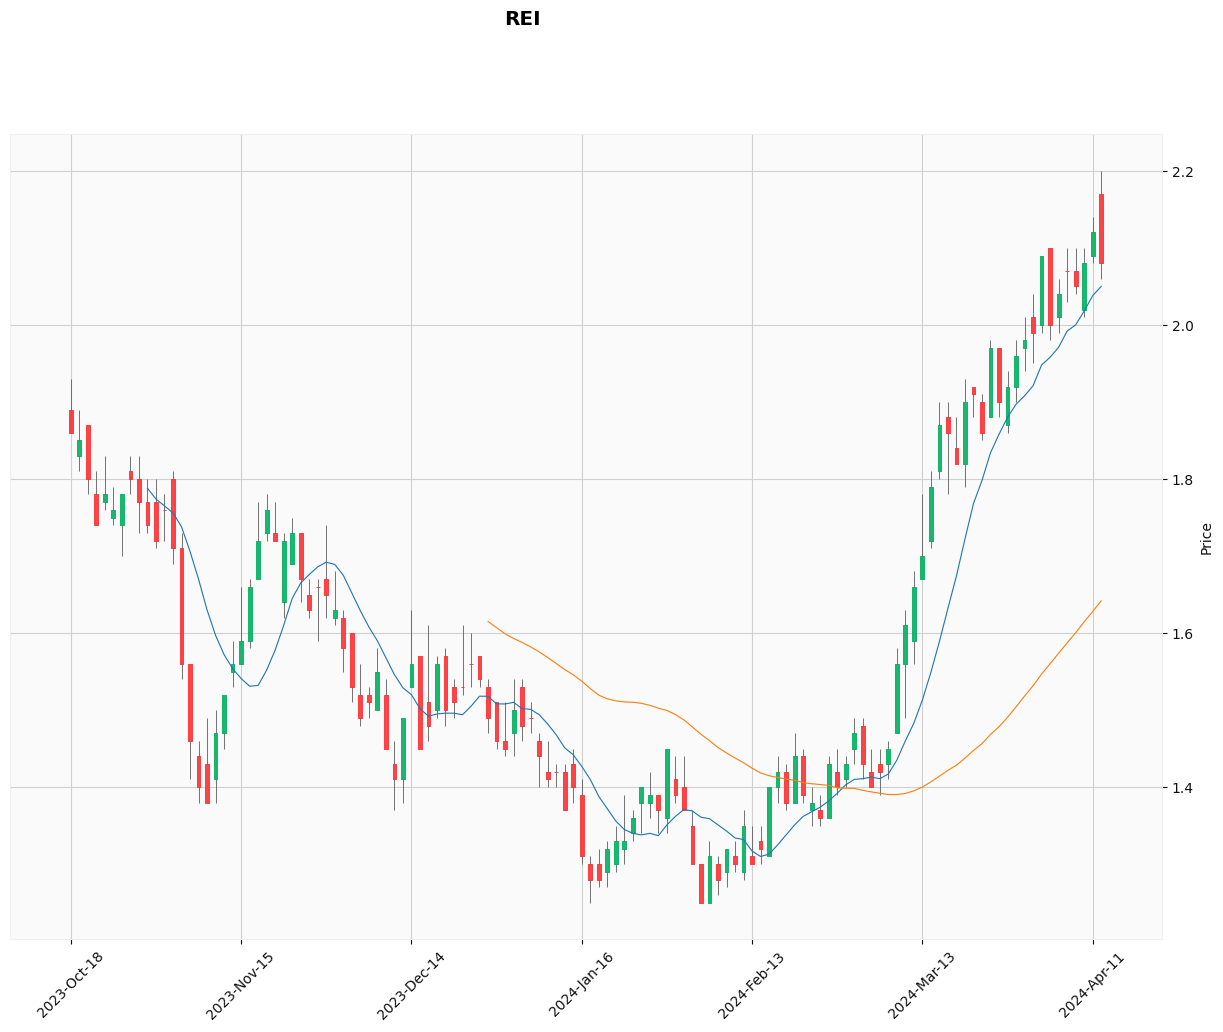

[*********************100%%**********************]  1 of 1 completed


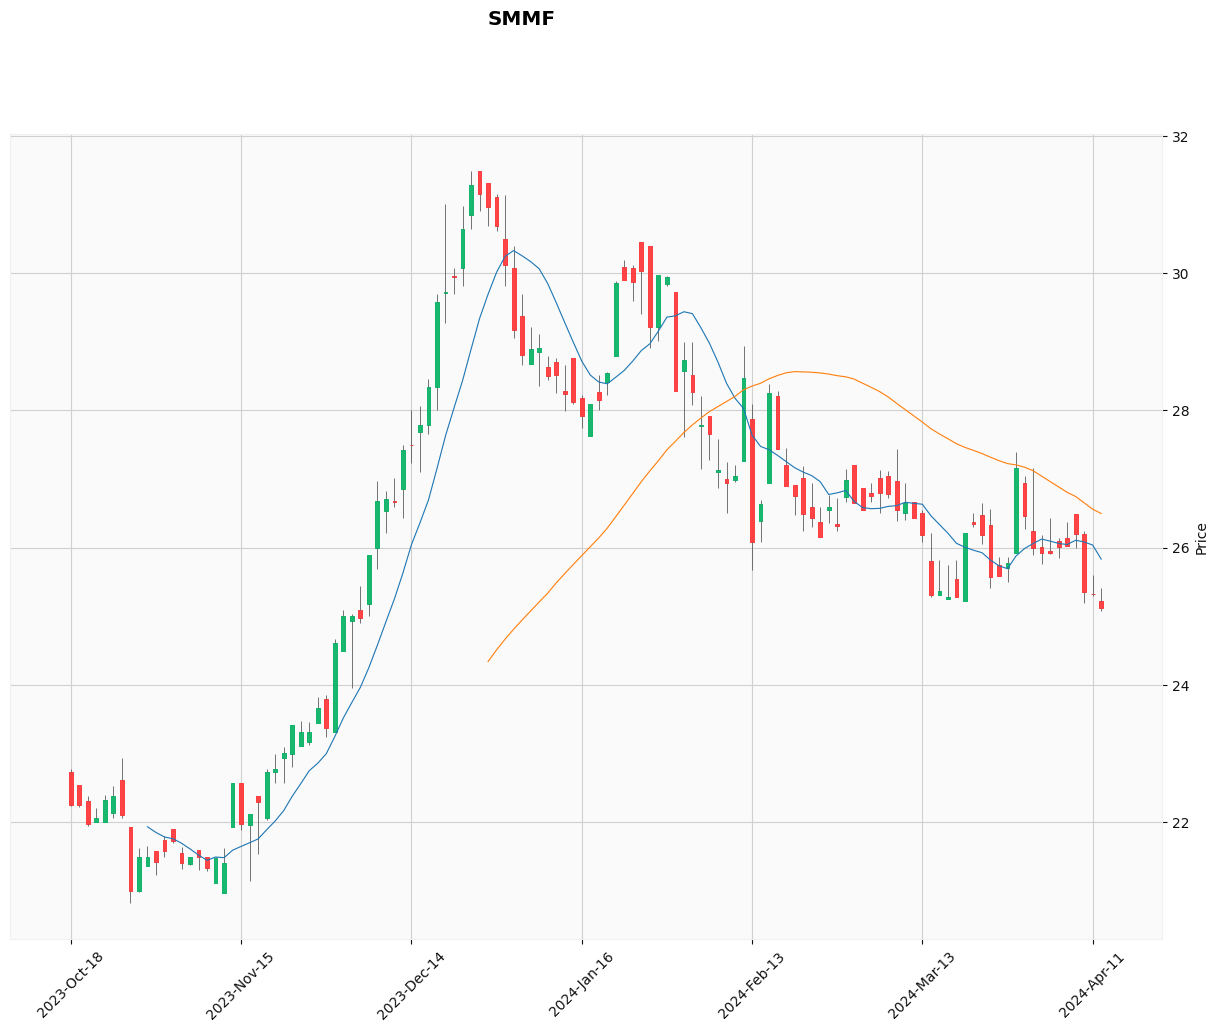

[*********************100%%**********************]  1 of 1 completed


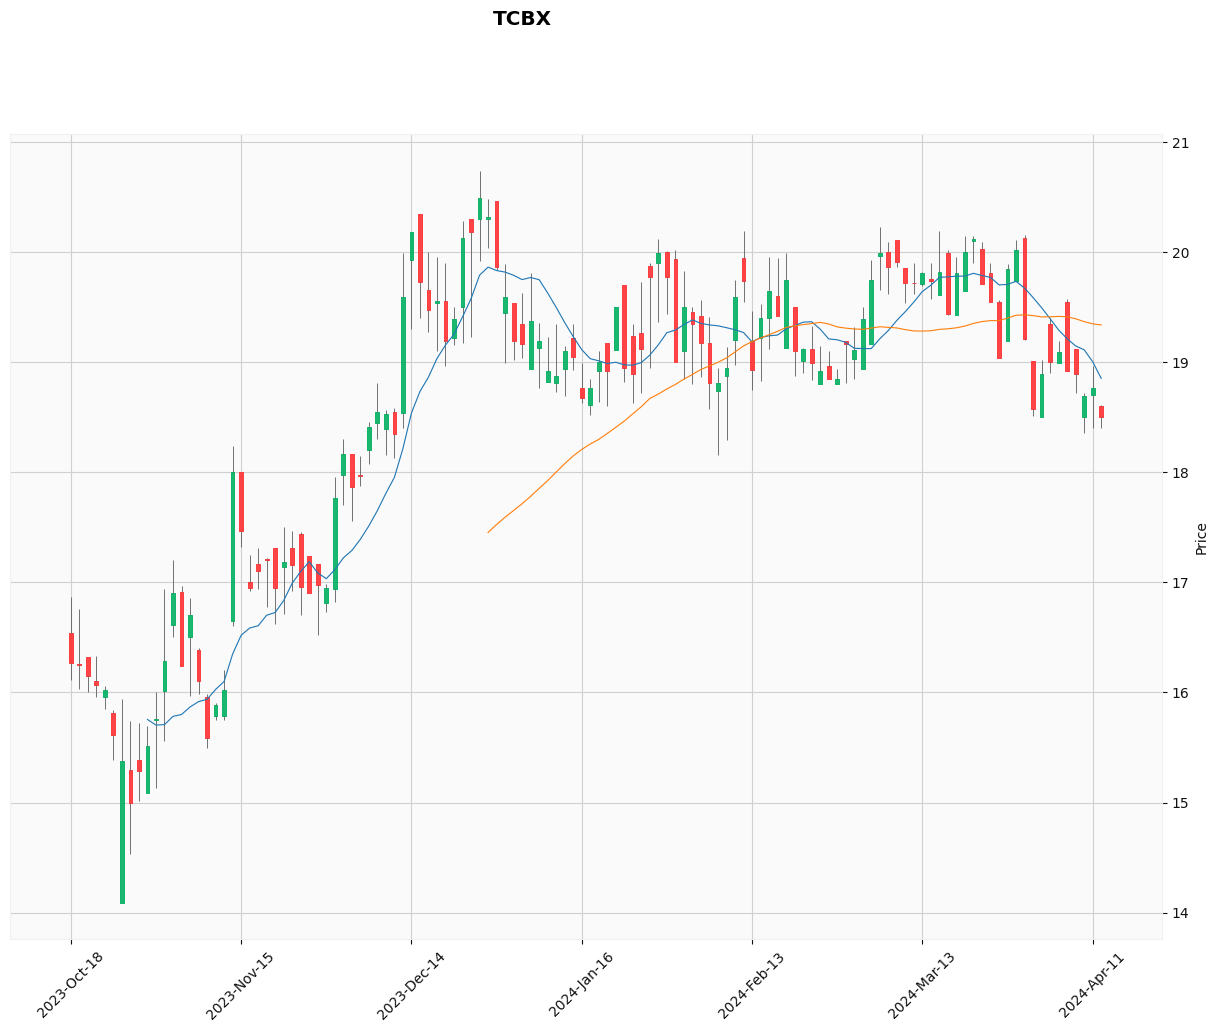

[*********************100%%**********************]  1 of 1 completed


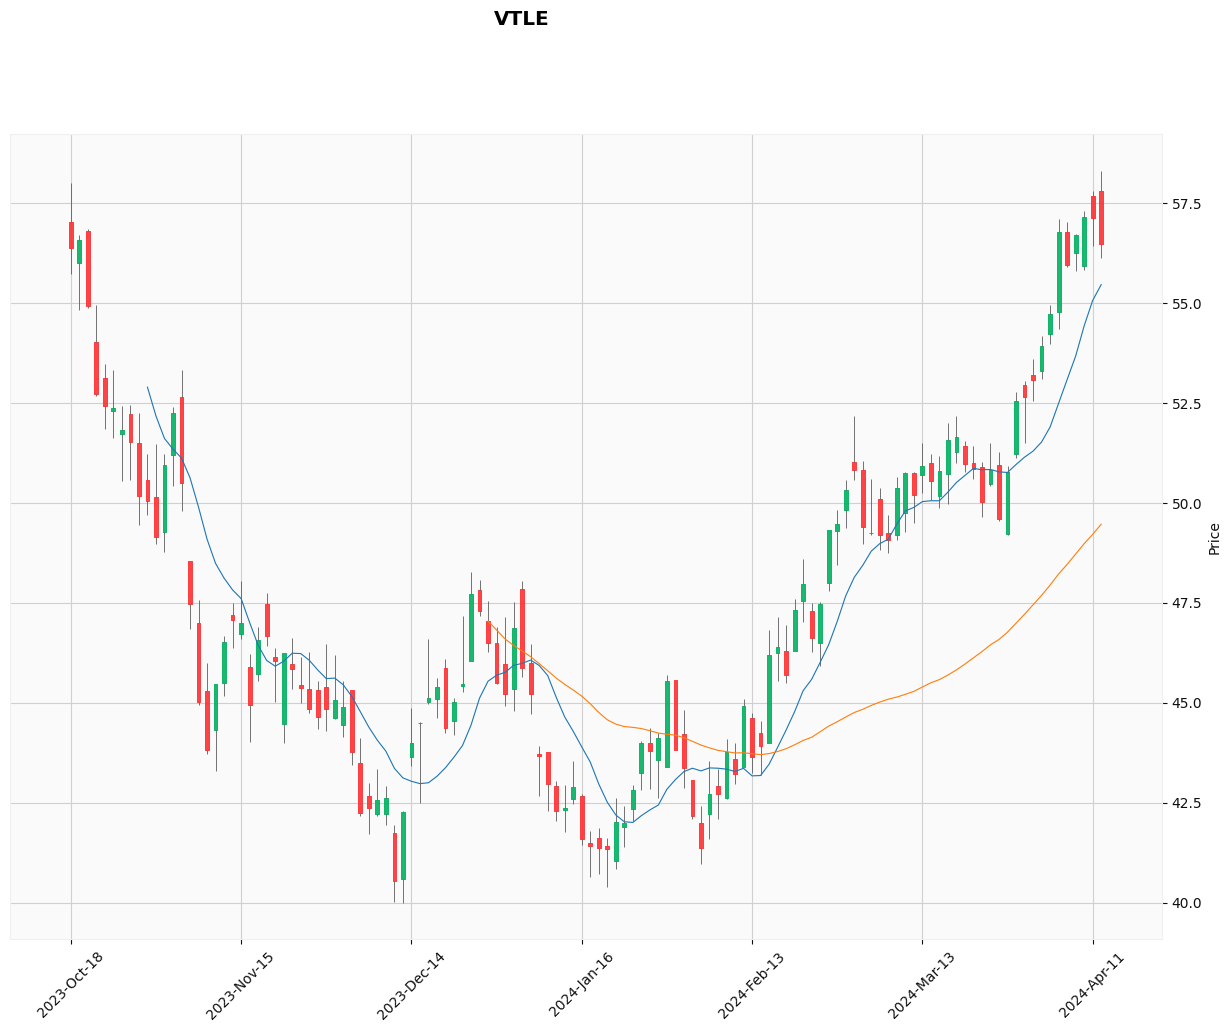

[*********************100%%**********************]  1 of 1 completed


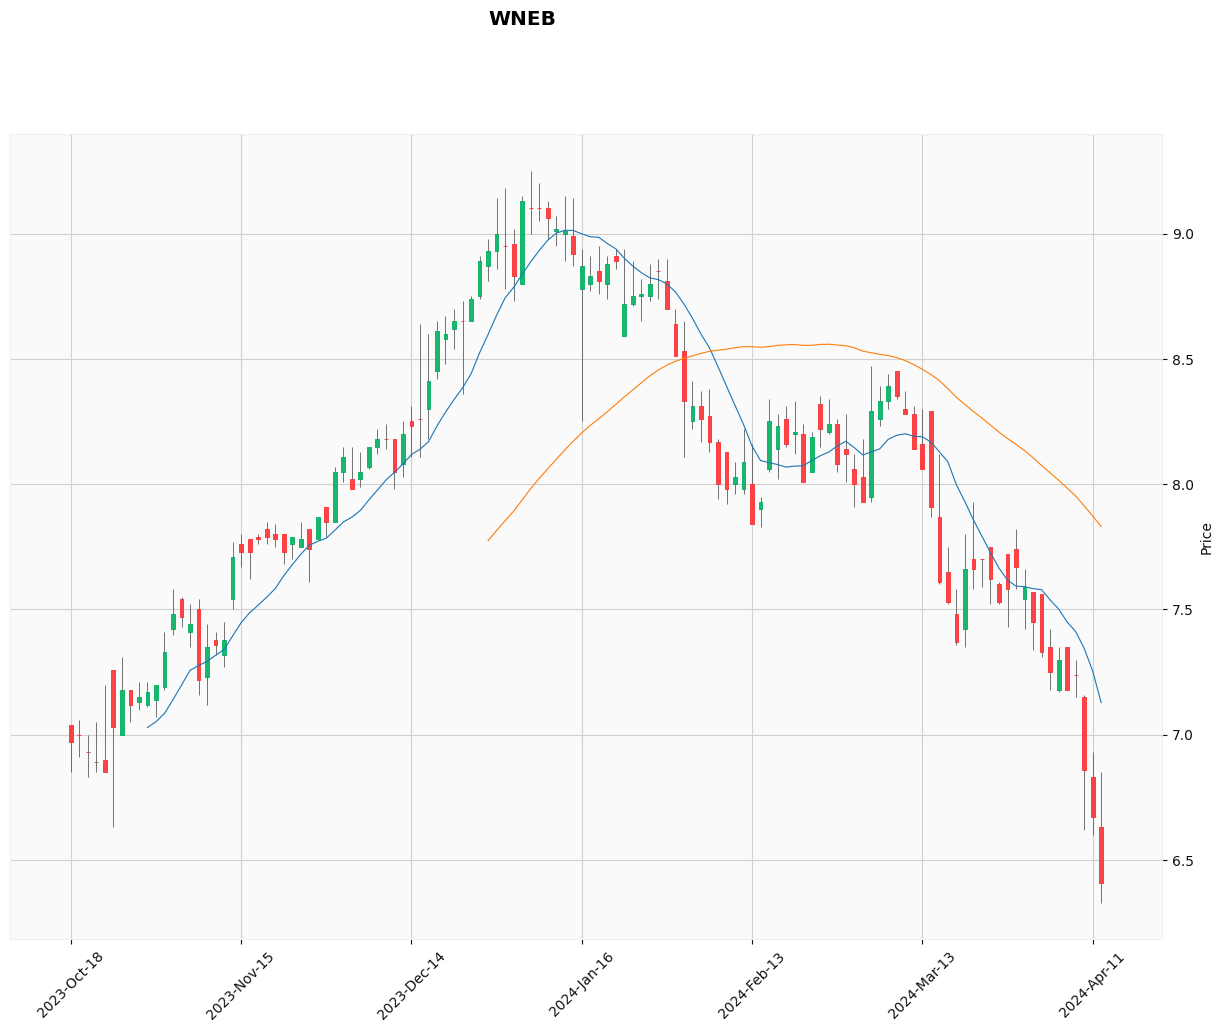

In [7]:
# 180 day Share Price PLUS 10 day and 50 day Moving Average Charts
import datetime
import pandas as pd
import yfinance as yf
import mplfinance as mpf

def plot_line_chart(data, ticker_symbol):
    # Plot line chart
    mpf.plot(data, type='candle', mav=(10,50), style='yahoo', title=ticker_symbol, figscale=2)

# Read overview.csv into DataFrame
df = pd.read_csv('out/overview.csv')

# Extract tickers from the 'Ticker' column
tickers = df['Ticker']
company = df['Company']

# Iterate through each stock ticker in the DataFrame
for ticker_symbol in tickers:
    # Calculate start date as 180 days before the current date
    end_date = datetime.datetime.now().date()
    start_date = end_date - datetime.timedelta(days=180)
    
    # Get historical stock price data
    data = yf.download(ticker_symbol, start=start_date, end=end_date)
    
    # Plot line chart for each stock
    plot_line_chart(data, ticker_symbol)



In [8]:
# 1. Import Libraries

# Import necessary libraries
import pandas as pd
import numpy as np
from tradingview_ta import TA_Handler, Interval, Exchange
import yfinance as yf
import mplfinance as mpf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

us_exchanges = ["NYSE", "NASDAQ", "AMEX", "CHX", "BZX", "BX", "PHLX", "PSX"]

# Read overview.csv into DataFrame
df = pd.read_csv('out/overview.csv')

# Extract tickers from the 'Ticker' column
tickers = df['Ticker']

tickers_data = []

# Iterate through each ticker
for ticker in tickers:
    found_data = False
    
    # Iterate through each US exchange
    for exchange in us_exchanges:
        try:
            # Retrieve data for the ticker from the current exchange
            data = TA_Handler(
                symbol=ticker,
                screener="america",
                exchange=exchange,
                interval="1d"
            )
            data = data.get_analysis().summary
            tickers_data.append(data)
            
            # If data is found, set found_data to True and break out of the loop
            found_data = True
            break

        except Exception as e:
            # Print error message if no data is found for the ticker on the current exchange
            print(f"No data found for ticker {ticker} in {exchange}. Error: {e}")

    
    # If data is not found for any exchange, print a message
    if not found_data:
        print(f"No data found for ticker {ticker} on any US exchange.")

print("Data successfully imported.")

recommendations = []
buys = []
sells = []
neutrals = []

# Iterate through each data in tickers_data
for data in tickers_data:
    recommendation = data.get('RECOMMENDATION')
    buy = data.get('BUY')
    sell = data.get('SELL')
    neutral = data.get('NEUTRAL')
    
    recommendations.append(recommendation)
    buys.append(buy)
    sells.append(sell)
    neutrals.append(neutral)

data = {
    'Ticker': tickers,
    'Recommendations': recommendations,
    'Buys': buys,
    'Sells': sells,
    'Neutrals': neutrals
}

df = pd.DataFrame(data)
# Define the order of categories
order_categories = {
    'STRONG_BUY': 5,
    'BUY': 4,
    'NEUTRAL': 3,
    'SELL': 2,
    'STRONG_SELL': 1
}

# Assign a numerical value to each category in a new column "Order"
df['Order'] = df['Recommendations'].map(order_categories)
df = df.sort_values('Order', ascending=True).reset_index(drop=True)

# Drop the "Order" column if not needed in the final output
df = df.drop('Order', axis=1)

# Display the sorted dataframe
df


No data found for ticker BOOM in NYSE. Error: Exchange or symbol not found.
No data found for ticker BWEN in NYSE. Error: Exchange or symbol not found.
No data found for ticker CAAS in NYSE. Error: Exchange or symbol not found.
No data found for ticker CBFV in NYSE. Error: Exchange or symbol not found.
No data found for ticker CNOB in NYSE. Error: Exchange or symbol not found.
No data found for ticker FSBW in NYSE. Error: Exchange or symbol not found.
No data found for ticker HAFC in NYSE. Error: Exchange or symbol not found.
No data found for ticker OPBK in NYSE. Error: Exchange or symbol not found.
No data found for ticker REI in NYSE. Error: Exchange or symbol not found.
No data found for ticker REI in NASDAQ. Error: Exchange or symbol not found.
No data found for ticker SMMF in NYSE. Error: Exchange or symbol not found.
No data found for ticker TCBX in NYSE. Error: Exchange or symbol not found.
No data found for ticker WNEB in NYSE. Error: Exchange or symbol not found.
Data success

,Ticker,Recommendations,Buys,Sells,Neutrals
0,BOOM,STRONG_SELL,0,17,9
1,BWEN,STRONG_SELL,0,17,9
2,FSBW,SELL,2,16,8
3,TCBX,SELL,4,14,8
4,SMMF,SELL,4,14,8
5,OPBK,SELL,2,16,8
6,MTW,SELL,2,15,9
7,HAFC,SELL,2,14,10
8,WNEB,SELL,5,14,7
9,FNB,SELL,5,12,9


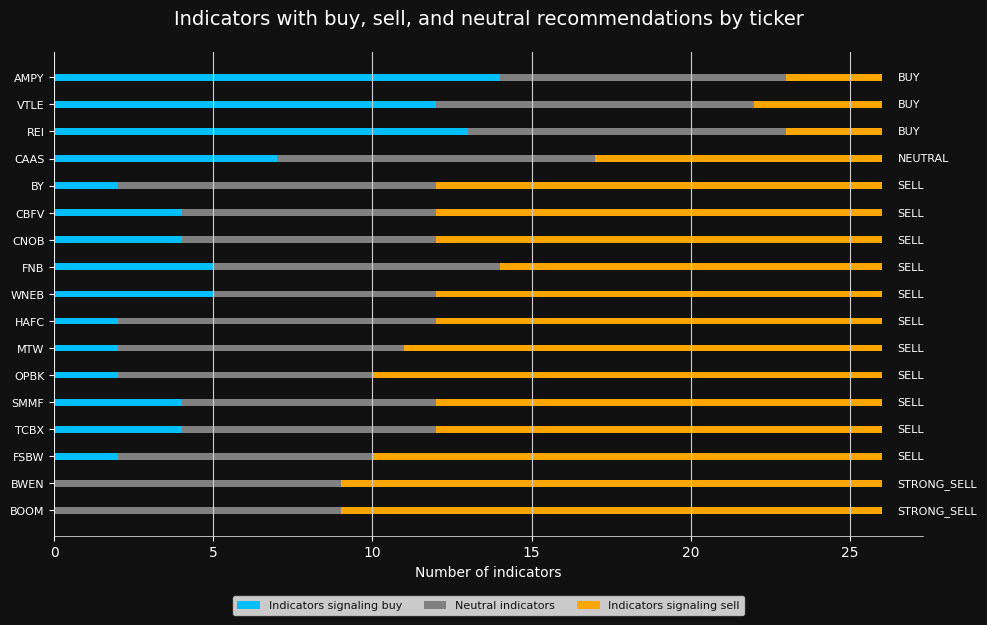

In [9]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('#111111')
ax.set_facecolor('#111111')

# Add the horizontal bars for buys, neutrals, and sells
ax.barh(df.index, df["Buys"], height=0.25, color='#00BFFF', label='Indicators signaling buy')
ax.barh(df.index, df["Neutrals"], height=0.25, color='#808080', label='Neutral indicators', left=df["Buys"])
ax.barh(df.index, df["Sells"], height=0.25, color='#FFA500', label='Indicators signaling sell', left=df["Buys"] + df["Neutrals"])

# Set the axes labels
ax.set_yticks(df.index)
ax.set_yticklabels(df["Ticker"], fontsize=8, color='white')
ax.set_xlabel('Number of indicators', fontsize=10, color='white')

# Add title with larger font size and additional spacing
ax.set_title('Indicators with buy, sell, and neutral recommendations by ticker', fontsize=14, color='white', pad=20)

# Add the annotations
for i, recommendation in enumerate(df["Recommendations"]):
    ax.annotate(recommendation, xy=(25, i), xytext=(26.5, i),
                color='white', fontsize=8, va='center', ha='left')

# Remove the horizontal grid lines
ax.yaxis.grid(False)

# Configure the tick and axis styles
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Adjust the spacing
plt.tight_layout()

# Set the text color of the legend to white
legend = ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.175), ncol=3, fontsize=8)
for text in legend.get_texts():
    text.set_color('#111111')

# Display the plot
plt.show()

In [10]:
recommendations = []
buys = []
sells = []
neutrals = []

# Iterate through each data in tickers_data
for data in tickers_data:
    recommendation = data.get('RECOMMENDATION')
    buy = data.get('BUY')
    sell = data.get('SELL')
    neutral = data.get('NEUTRAL')
    
    recommendations.append(recommendation)
    buys.append(buy)
    sells.append(sell)
    neutrals.append(neutral)

data = {
    'Ticker': tickers,
    'Recommendations': recommendations,
    'Buys': buys,
    'Sells': sells,
    'Neutrals': neutrals
}

df = pd.DataFrame(data)
# Define the order of categories
order_categories = {
    'STRONG_BUY': 5,
    'BUY': 4,
    'NEUTRAL': 3,
    'SELL': 2,
    'STRONG_SELL': 1
}

# Assign a numerical value to each category in a new column "Order"
df['Order'] = df['Recommendations'].map(order_categories)
df = df.sort_values('Order', ascending=True).reset_index(drop=True)

# Drop the "Order" column if not needed in the final output
df = df.drop('Order', axis=1)

# Display the sorted dataframe
df

,Ticker,Recommendations,Buys,Sells,Neutrals
0,BOOM,STRONG_SELL,0,17,9
1,BWEN,STRONG_SELL,0,17,9
2,FSBW,SELL,2,16,8
3,TCBX,SELL,4,14,8
4,SMMF,SELL,4,14,8
5,OPBK,SELL,2,16,8
6,MTW,SELL,2,15,9
7,HAFC,SELL,2,14,10
8,WNEB,SELL,5,14,7
9,FNB,SELL,5,12,9
